In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import random
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
#from userclass import User
import json
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
import random
from userclass import User
from sklearn.model_selection import LeaveOneOut
from Utils import recepten_bij_ingredient, ingredienten_bij_recept, recepten_bij_tag, tags_bij_recept, fillInMatrix, customUserDecoder
from itertools import permutations
import seaborn as sns

In [2]:
#meeste_tags_lijst_10

In [3]:
Lijst = ["A", "B", "C", "D"]

#Combinaties_Tags = list(permutations(meeste_tags_lijst_10, 2))

Combinaties_Tags = list(permutations(Lijst, 2))
print(Combinaties_Tags)

#score = [x for x in range(len(Combinaties_Tags))]
#test = list(zip(Combinaties_Tags, score))
#print(test)

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'A'), ('B', 'C'), ('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'D'), ('D', 'A'), ('D', 'B'), ('D', 'C')]


In [4]:
tagComparisonDf = pd.read_csv("Data/TagComparisonScoreSpecific.csv", index_col=0)
display(tagComparisonDf)

,Tag,CrossTag,BestClassifier,Accuracy,RecallScore,ConfusionMatrix
0,aziatisch,hollands,Multinomial Naive Bayes,1.000000,1.000000,[[30 0]\n [ 0 30]]
1,aziatisch,mexicaans,Multinomial Naive Bayes,1.000000,1.000000,[[30 0]\n [ 0 30]]
2,aziatisch,italiaans,Multinomial Naive Bayes,1.000000,1.000000,[[30 0]\n [ 0 30]]
3,aziatisch,mediterraan,Multinomial Naive Bayes,1.000000,1.000000,[[30 0]\n [ 0 30]]
4,hollands,aziatisch,Multinomial Naive Bayes,1.000000,1.000000,[[30 0]\n [ 0 30]]
5,hollands,mexicaans,Multinomial Naive Bayes,1.000000,1.000000,[[30 0]\n [ 0 30]]
6,hollands,italiaans,Multinomial Naive Bayes,1.000000,1.000000,[[30 0]\n [ 0 30]]
7,hollands,mediterraan,Multinomial Naive Bayes,1.000000,1.000000,[[30 0]\n [ 0 30]]
8,mexicaans,aziatisch,Multinomial Naive Bayes,1.000000,1.000000,[[30 0]\n [ 0 30]]
9,mexicaans,hollands,Multinomial Naive Bayes,1.000000,1.000000,[[30 0]\n [ 0 30]]


,aziatisch,hollands,mexicaans,italiaans,mediterraan
aziatisch,0,1,1,1,1.000000
hollands,1,0,1,1,1.000000
mexicaans,1,1,0,1,1.000000
italiaans,1,1,1,0,0.966667
mediterraan,1,1,1,1,0.000000


<AxesSubplot:>

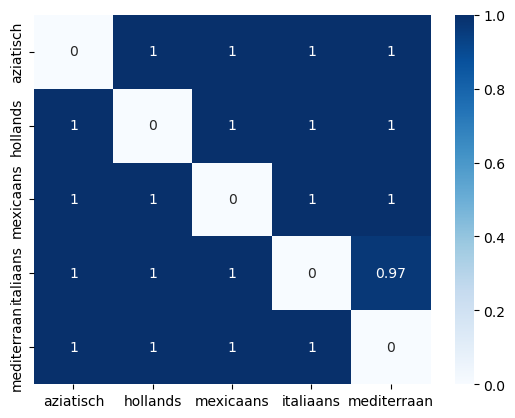

In [5]:
keukens = tagComparisonDf["Tag"].unique().tolist()

df = pd.DataFrame(0, index=keukens, columns=keukens)

for i in range(len(tagComparisonDf["Tag"].tolist())):
    df.loc[tagComparisonDf["Tag"][i],tagComparisonDf["CrossTag"][i]] = tagComparisonDf["Accuracy"][i]
    #df.loc[tagComparisonDf["Tag"][i],tagComparisonDf["CrossTag"][i]] = 1

np.fill_diagonal(df.values, 0)
#BONNO: Hier dus de juiste accuracy score invullen bij de juiste rij-kolom en dan maakt ie er zelf een heatmap van
#Bijvoorbeeld:

#df.loc["aziatisch", "hollands"] = 0.6


#

display(df)
sns.heatmap(df, annot=True, cmap="Blues")